<h2>Libraries<h2>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# Read CSV
file_path_ch_cust = r"c:\Users\sarah\Desktop\ch_customers\data\bank_churners_drop_incorrect_columns.csv"
df_churners = pd.read_csv(file_path_ch_cust)
df_churners.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


<h3>EDA<h3>

In [34]:
df_churners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [38]:
#Target Variable
df_churners['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [50]:
original_df_columns = df_churners.columns.to_list()
original_df_columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

array([[<AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Relationship_Count'}>],
       [<AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>],
       [<AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>],
       [<AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

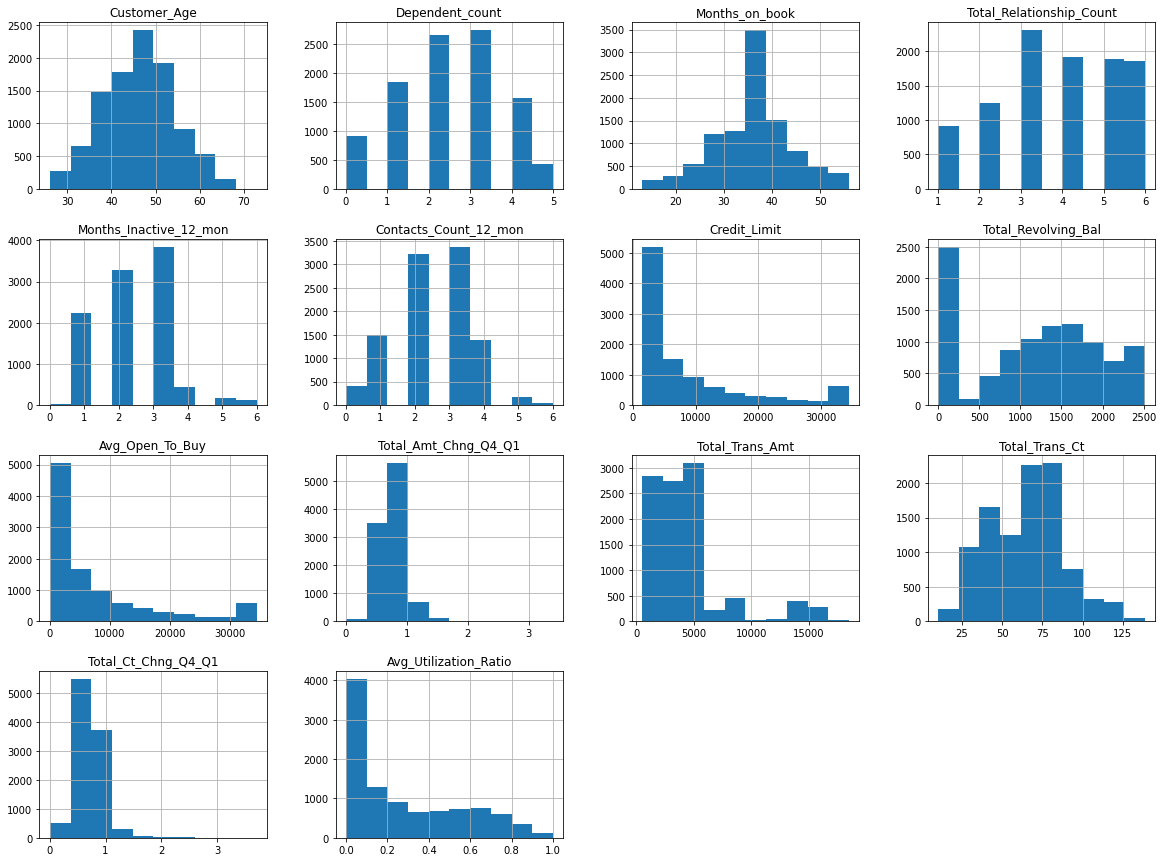

In [42]:
df_churners.drop(columns=['CLIENTNUM','Attrition_Flag']).hist(figsize=(20,15))

<AxesSubplot:>

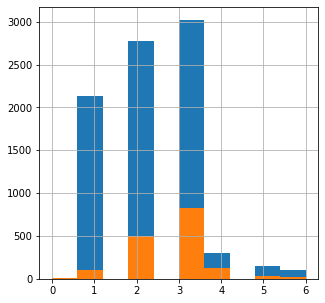

In [91]:
df_churners['Months_Inactive_12_mon'].loc[df_churners['Attrition_Flag'] == 'Existing Customer'].hist(figsize=(5,5))
df_churners['Months_Inactive_12_mon'].loc[df_churners['Attrition_Flag'] == 'Attrited Customer'].hist(figsize=(5,5))

<AxesSubplot:>

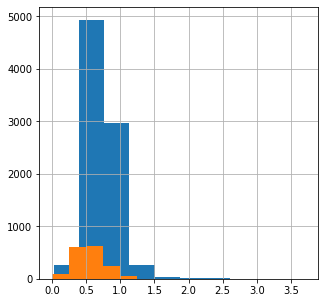

In [93]:
df_churners['Total_Ct_Chng_Q4_Q1'].loc[df_churners['Attrition_Flag'] == 'Existing Customer'].hist(figsize=(5,5))
df_churners['Total_Ct_Chng_Q4_Q1'].loc[df_churners['Attrition_Flag'] == 'Attrited Customer'].hist(figsize=(5,5))

In [ ]:
df_churners['Total_Revolving_Bal'].loc[df_churners['Attrition_Flag'] == 'Existing Customer'].hist(figsize=(5,5))
df_churners['Total_Revolving_Bal'].loc[df_churners['Attrition_Flag'] == 'Attrited Customer'].hist(figsize=(5,5))

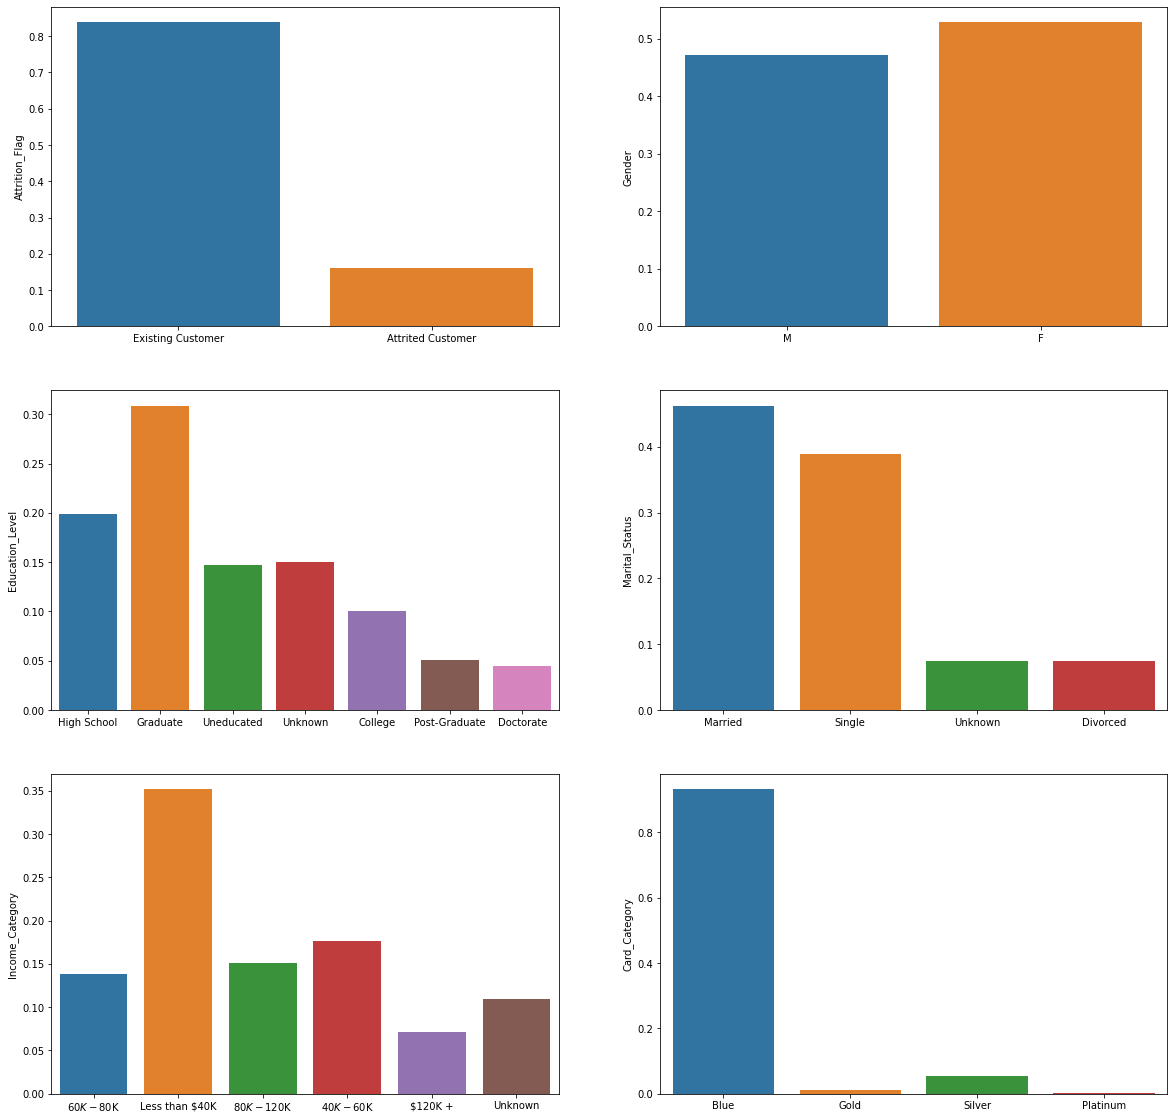

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
cat_features = [column for column in df_churners.columns if df_churners[column].dtype == "object"]
for i in range(len(cat_features)):
    plt.subplot(3, 2, i+1)
    s = df_churners[cat_features[i]].value_counts(sort=False) / df_churners.shape[0]
    sns.barplot(x=s.index, y=s)

In [68]:
cc_count = df_churners['Card_Category'].value_counts()
cc_count

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [78]:
cc_count = cc_count.to_frame().reset_index().rename(columns={'index':'Card_Category', 'Card_Category':'Card_Category_count'})
cc_count

,Card_Category,Card_Category_count
0,Blue,9436
1,Silver,555
2,Gold,116
3,Platinum,20


In [82]:
attrited_by_cc = df_churners[['Attrition_Flag','Card_Category']].loc[df_churners['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts().reset_index().rename(columns={'index':'Card_Category_attrited', 'Card_Category':'Card_Category_count_attrited'})
attrited_by_cc

,Card_Category_attrited,Card_Category_count_attrited
0,Blue,1519
1,Silver,82
2,Gold,21
3,Platinum,5


In [84]:
cc_cat_total_vs_attrited = pd.merge(cc_count, attrited_by_cc, how='left', left_on=['Card_Category'], right_on=['Card_Category_attrited']).drop(columns=['Card_Category_attrited'])
cc_cat_total_vs_attrited

,Card_Category,Card_Category_count,Card_Category_count_attrited
0,Blue,9436,1519
1,Silver,555,82
2,Gold,116,21
3,Platinum,20,5


In [86]:
cc_cat_total_vs_attrited['attrited_vs_total'] = cc_cat_total_vs_attrited['Card_Category_count_attrited'] / cc_cat_total_vs_attrited['Card_Category_count']
cc_cat_total_vs_attrited

,Card_Category,Card_Category_count,Card_Category_count_attrited,attrited_vs_total
0,Blue,9436,1519,0.160979
1,Silver,555,82,0.147748
2,Gold,116,21,0.181034
3,Platinum,20,5,0.250000


<h2>Model<h2>

<h4>Feature Engineering<h4>

In [94]:
#Drop Irrelevant Columns for the Model
features_df = churn_cust_df.drop(columns=['CLIENTNUM'])

In [100]:
#Target
features_df['target'] = features_df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})
features_df = features_df.drop(columns=['Attrition_Flag'])

In [101]:
features_df['target'].value_counts()

0    8500
1    1627
Name: target, dtype: int64

In [102]:
def identify_categorical_variables(df):
    cat_var_list = []
    for column in df.columns:
        if df[column].dtype == 'object':
            cat_var_list.append(column)
    return cat_var_list

In [103]:
categorical_cols_list = identify_categorical_variables(features_df)
categorical_cols_list

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [106]:
def identify_numerical_columns(df):
    num_col_list = []
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64'] and column != 'target':
            num_col_list.append(column)
    return num_col_list

In [107]:
numerical_columns_list = identify_numerical_columns(features_df)
numerical_columns_list

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [116]:
pd.get_dummies(features_df[categorical_cols_list]).head(3)

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [115]:
features_df[numerical_columns_list].head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [117]:
predictors_df = pd.merge(pd.get_dummies(features_df[categorical_cols_list]), features_df[numerical_columns_list], how='left', left_index=True, right_index=True)
predictors_df

,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,1,0,0,0,1,0,0,0,0,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,0,0,1,0,0,0,0,0,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,1,0,0,1,0,0,0,0,0,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,0,0,0,0,1,0,0,0,0,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,1,0,0,0,0,0,1,0,0,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1,0,0,1,0,0,0,0,0,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,1,0,0,0,0,0,0,1,1,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,0,0,0,0,1,0,0,0,0,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,1,0,0,1,0,0,0,0,0,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [119]:
y_target = features_df['target'].values
x_features = predictors_df.values

<h4>Decision Tree<h4>

In [120]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [121]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features, y_target, test_size=.3, random_state=1)

In [131]:
print(np.sum(y_train)/len(y_train))
print(np.sum(y_validation)/len(y_validation))

0.1606941309255079
0.16057913787430075


In [132]:
#initiating Model
tree_ch_model = tree.DecisionTreeClassifier()

In [133]:
#Model Training
tree_ch_model = tree_ch_model.fit(x_train,y_train)

<h4>Accuracy<h4>

In [134]:
#Evaluating the model
tree_model_accuracy = tree_ch_model.score(x_validation, y_validation)
tree_model_accuracy

0.9361632115827575

In [148]:
predictors_df.columns.to_list()

['Gender_F',
 'Gender_M',
 'Education_Level_College',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$120K +',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Blue',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [150]:
tree_ch_model.feature_importances_

array([0.00056659, 0.        , 0.00142209, 0.00101955, 0.00052303,
       0.00557991, 0.        , 0.00148071, 0.00112528, 0.00408981,
       0.00601579, 0.00190034, 0.00247476, 0.00078454, 0.        ,
       0.00057337, 0.00078454, 0.00069737, 0.0009564 , 0.00052303,
       0.0009153 , 0.00103045, 0.        , 0.03042322, 0.00826548,
       0.01962074, 0.072589  , 0.01658102, 0.01964002, 0.01594686,
       0.19621999, 0.01413084, 0.05473592, 0.14762014, 0.28625096,
       0.07459927, 0.01091366])

Text(0.5, 0, 'Features')

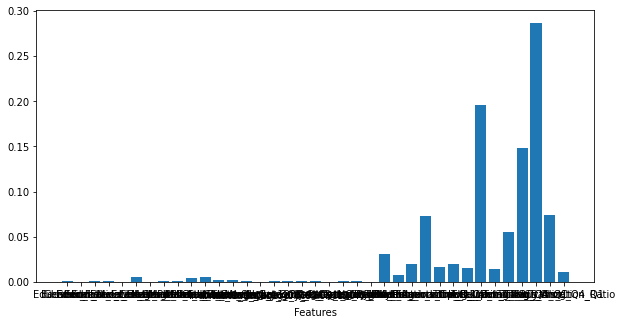

In [155]:
fig = plt.figure(figsize = (10, 5))
plt.bar(predictors_df.columns.to_list(), tree_ch_model.feature_importances_)
plt.xlabel('Features')

In [ ]:
# Cob

In [ ]:
#Next Steps, 
# 
# Evaluate Other Models like Ensamble Methods
# RandomForestClassi, AdaBoostClassi, Gradient Boos

# Improve Feature Engineering

# Deploy to Production

# Visualize Model Results in Power Bi and/or Tableau
